# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head(25)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
20,0,500.0,3.17,3.0
21,1,660.0,3.63,2.0
22,0,600.0,2.82,4.0
23,0,680.0,3.19,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [10]:
# TODO
len(df.index)

400

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [8]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [28]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [12]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: Because the measure vales for gre are larger than gpa, i.e. gre scores range from 220 to 800 while gpa ranges between 2.26 to 4.0

> ### Question 4.  Drop data points with missing data.

In [15]:
df=df.dropna(axis=0,how='any')

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [16]:
len(df.index)

397

In [17]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: The quartile values in the .describe() output returned (vs. earlier they returned NaN)

> ### Question 6.  Create boxplots for `gre` and `gpa`.

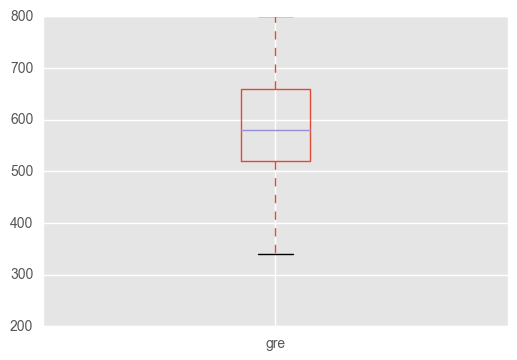

In [19]:
df.boxplot(column='gre', return_type='axes')

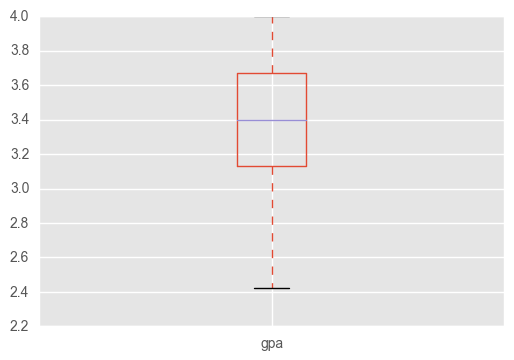

In [20]:
df.boxplot(column='gpa', return_type='axes')

> ### Question 7.  What do boxplots show?

Answer: It roughly shows you the distribution of each feature. It plots the five statistics (median, min, max, 1st and 3rd quartile points) and gives you a sense of skewness, i.e. if the median line cuts the box into two unequal pieces, that represents skew of data to the opposite direction

> ### Question 8.  Plot the distribution of each variable.

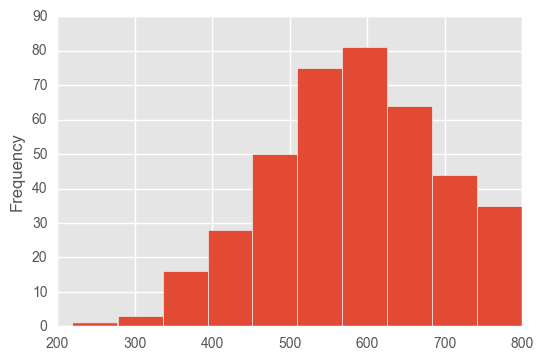

In [22]:
plt.style.use('ggplot')
df['gre'].plot(kind='hist')

In [51]:
df['gre'].mean()

587.8589420654912

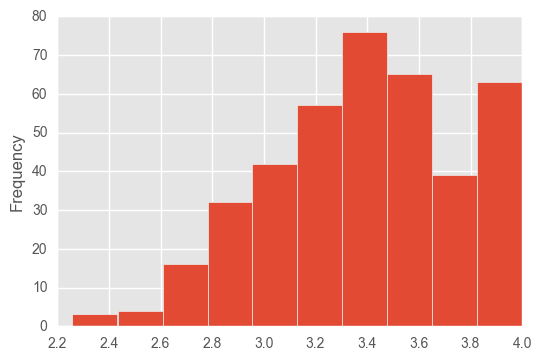

In [23]:
df['gpa'].plot(kind='hist')

In [54]:
df['gpa'].mean()

3.3922418136020167

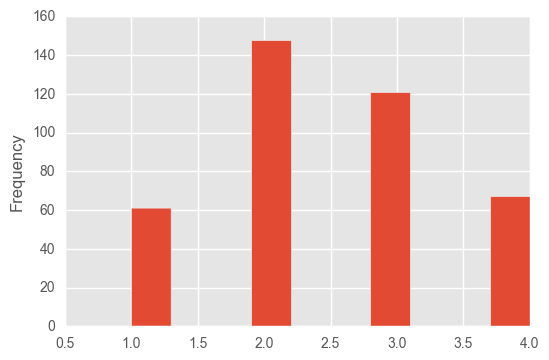

In [24]:
df['prestige'].plot(kind='hist')

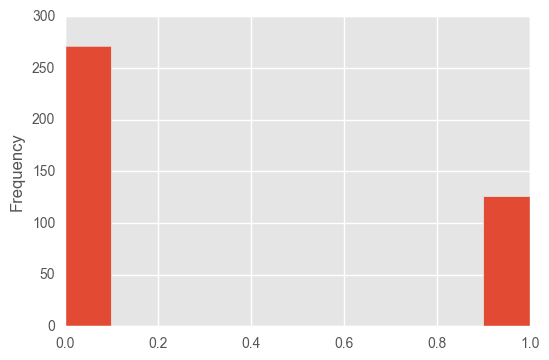

In [25]:
df['admit'].plot(kind='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: Assumption of normal distribution for 'gre' is reasonable as represented in the histogram above. However, 'gpa' would not meet that requirement. There is high frequency of 4.0 gpa's which is skewing the distribution for this feature. I would try a transformation (e.g. log or box-cox) to gpa to try and normalize the distribution.

> ### Question 10.  Create a correlation matrix for the dataset

In [29]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e3a710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11abcb350>]], dtype=object)

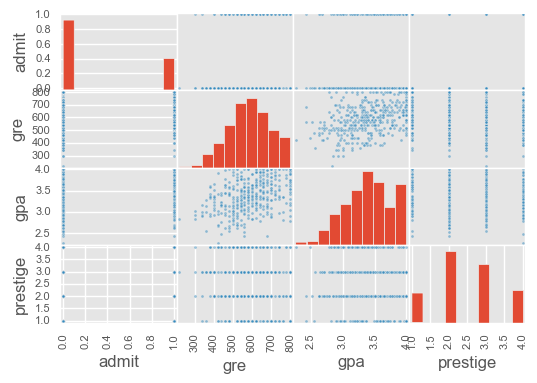

In [32]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)

In [33]:
# Compute the correlation matrix
corr = df.corr()

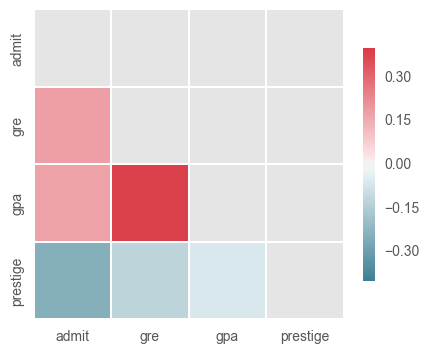

In [50]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: The highest correlation was between gre and gpa at .38. Though correlation is not too high, they might potentially be colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Run a linear regression with X=[gre, gpa, prestige] against y=admit after all the data munging and transformations mentioned above. This will tell us if and which variables are important in predicting graduate school admission rates. If 'prestige' is important, the coefficient will tell us the association.

> ### Question 13.  What is your hypothesis?

Answer: The higher the prestige of the undergraduate school, the more likely the individual will be admitted to graduate school.